# CREDIT CARD FRAUD DETECTION MODELS

Data source: https://www.kaggle.com/mlg-ulb/creditcardfraud

## OBJECTIVES

#### The dataset used in this notebook comprises of various credit card transactions in Europe. The objectives of this notebook are as follows:

- Perform descriptive statistics on the dataset.


- Pre-modelling: Observations and assumptions of the dataset.


- Create models that predicts fraudulent transactions using different machine learning models. 


- Model comparison and evaluation.

## SECTION 1: DESCRIPTIVE STATISTICS ANALYSIS

### IMPORTING NECESSARY LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### LOADING THE DATASET AND EXTRACTING BASIC INFORMATION

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
df['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

The highest transaction made was 25,691 pounds, and the least was 0. Averagely, the amount deducted was 88.3pounds. 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

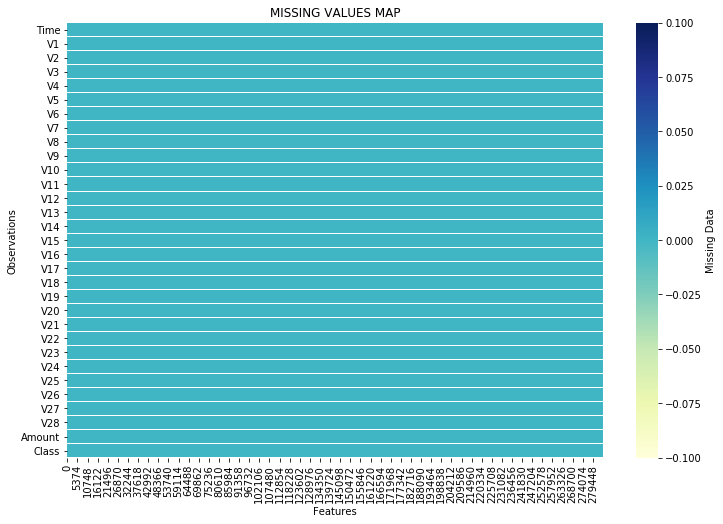

In [6]:
#Missing Values Map
plt.figure(figsize=(12, 8))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

plt.title('MISSING VALUES MAP')
plt.xlabel("Features")
plt.ylabel("Observations")
plt.show()

- There are 284807 entries and 31 variables, i.e 284807 rows and 31 columns. All of which are anonymized for privacy reasons. 


- The dataset appears clean with no missing values in any of the variables. This can be as a result of already transformed variables due to privacy reasons.


- Most variable data types are floats, except the class that is represented as integers. 


- The target variable is 'Class' and it is represented by 2 categories; 1 is fraudulent and 0 is non-fraudulent.


Next, the dataset will examined for duplicate entries.

In [7]:
#Duplicate entries

df.duplicated().value_counts()

False    283726
True       1081
dtype: int64

There are 1081 duplicated entries in the dataset. Before proceeding, these duplicates will be dropped to prevent bias.

In [8]:
df.drop_duplicates(keep ='last', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     28

In [9]:
legit = len(df[df.Class == 0])
fraud = len(df[df.Class == 1])
fraud_percent = (fraud / (fraud + legit)) * 100
print("There are " + str(legit) + " legit transactions.")
print("\n")
print("There are " + str(fraud) + " fraudulent transactions.")
print("\n")
print("The percentage of fraudulent transactions in the dataset is: {:.2f}%.".format(fraud_percent))

There are 283253 legit transactions.


There are 473 fraudulent transactions.


The percentage of fraudulent transactions in the dataset is: 0.17%.


In [10]:
df['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

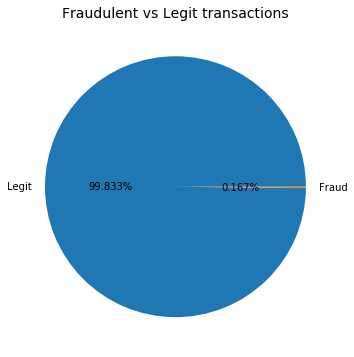

In [11]:
data = df['Class'].value_counts()

fig,ax = plt.subplots(figsize = [10,6])
labels = ["Legit", "Fraud"]
ax.pie(x = data, labels = labels, pctdistance = 0.5, autopct='%1.3f%%')
ax.set_title("Fraudulent vs Legit transactions", fontsize = 14);
plt.savefig('FraudulentPieChart.png')

From the pie chart above, it is also clear that 99.833% of the transactions are legit. However, just a very minute percentage of 0.167 is classified fruadulent.

This shows that the dataset is imbalanced. This will be revisited.

#### TIME VS AMOUNT FOR FRAUDULENT TRANSACTIONS

A scatter plot can be used to see how time is related to the amount of fraudulent transactions.

First, investigation on the behaviour of fraudulent transactions with respect to the time of the day we be performed.

In [12]:
df_fraud = df[df['Class'] == 1]

df_fraud['Amount'].describe()

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

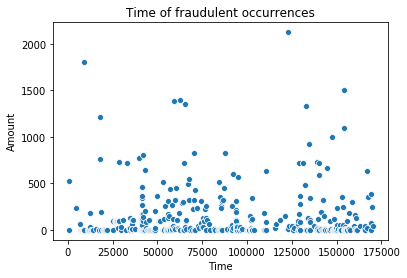

In [13]:
sns.scatterplot(data=df_fraud, x='Time', y='Amount')
plt.title('Time of fraudulent occurrences')
plt.show()

From the plot above, it is clear that the time of the day has no significant correlation to the fraudulent transactions. This means that these transactions could have happened at anytime of the day. 

## SECTION 2: PRE-MODELLING: OBSERVATIONS AND ASSUMPTIONS OF THE DATASET

### SCALING

In [14]:
#Recalling the dataset

df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


From the dataset, it is observed that the 'Time' and 'Amount' features contain datapoints with far ranges. To ensure all features, including the 'time' and 'amount' contribute equally to the dataset, these features need to be scaled. Scaling will normalize these feature into a finite range, similar to that of other features in the dataset.

This step, and all others will be included to the pipeline steps of the model.

### BALANCING

Next, the imbalanced dataset will be revisited with three different techniques.

- Oversampling technique: SMOTE (Synthetic Minority Oversampling Technique)


- Undersampling technique: Near-Miss Algorithm


- Balancing technique: Combined Random Sampler

In [15]:
#Splitting into dependent and independent variables

X = df.drop(['Class'], axis=1)
Y = df['Class']

#### OVERSAMPLING WITH SMOTE

By using SMOTE, the fraudulent transaction class samples are increased randomly to achieve a more balanced distribution.  

In [16]:
from imblearn.over_sampling import SMOTE

over_smp = SMOTE()
x_sm, y_sm = over_smp.fit_resample(X, Y)

print(f'''Shape of x_bal before SMOTE: {X.shape}
Shape of x_bal after SMOTE: {x_sm.shape}''')

print(f'''Shape of y_bal before SMOTE: {Y.shape}
Shape of y_bal after SMOTE: {y_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of x_bal before SMOTE: (283726, 30)
Shape of x_bal after SMOTE: (566506, 30)
Shape of y_bal before SMOTE: (283726,)
Shape of y_bal after SMOTE: (566506,)

Balance of positive and negative classes (%):


1    50.0
0    50.0
Name: Class, dtype: float64

With SMOTE, a 50 -50 balance between both classes was achieved. However, there is a risk of overfitting. 

#### UNDERSAMPLING WITH NEAR-MISS ALGORITHM

By using Near-miss, the majority class is undersampled to achieve a more balanced distribution.

In [17]:
from imblearn.under_sampling import NearMiss

under_smp = NearMiss()

x_nm, y_nm = under_smp.fit_resample(X, Y)

print(f'''Shape of x_bal before NearMiss Algorithm: {X.shape}
Shape of x_bal after NearMiss Algorithm: {x_nm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_nm.value_counts(normalize=True) * 100

Shape of x_bal before NearMiss Algorithm: (283726, 30)
Shape of x_bal after NearMiss Algorithm: (946, 30)

Balance of positive and negative classes (%):


1    50.0
0    50.0
Name: Class, dtype: float64

With NearMiss, a 50 -50 balance between both classes was achieved. However, there is a risk of losing valuable information. Next consideration is a combination of both over and undersampling methods to balance the distribution. 

#### BALANCING WITH RANDOM SAMPLER

In [18]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

over = RandomOverSampler(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.8)

# Oversampling minority class
x_over, y_over = over.fit_resample(X, Y)

# Combine with under sampling 
x_combined_sampling, y_combined_sampling = under.fit_resample(x_over, y_over)
print(f'''Shape of x_bal before Combined Random Sampler: {X.shape}
Shape of x_bal after Combined Random Sampler: {x_combined_sampling.shape}''')

print('\nBalance of positive and negative classes (%):')
y_combined_sampling.value_counts(normalize=True) * 100

Shape of x_bal before Combined Random Sampler: (283726, 30)
Shape of x_bal after Combined Random Sampler: (318658, 30)

Balance of positive and negative classes (%):


0    55.555486
1    44.444514
Name: Class, dtype: float64

### FEATURE SELECTION

To have a more effective model, the input variables will be reduced using Linear Discriminant Analysis (LDA) or Principal Component Analysis (PCA). 

There are 30 features present in the dataset that can be used to predict the class of transaction. 

However, the most important features will be selected for the following reasons: 
    
- To reduce noise: with less redundant data, the risk of making decisions from noise is reduced.


- To improve accuracy: accuracy improves with less misleading data.

    
- To reduce training time: the model trains faster with less data.

In [89]:
#New split for the feature selection process

x_fsel = x_combined_sampling.copy()
y_fsel = y_combined_sampling.copy()

In [90]:
train_x3, test_x3, train_y3, test_y3 = train_test_split(x_fsel, y_fsel, test_size=0.33, random_state=42)

In [91]:
feat_sel = dict()

#### Principal Component Analysis (PCA)

In [92]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

pca_steps = [('pca', PCA()), 
             ('m', LogisticRegression(solver='liblinear'))]

feat_sel.update({'PCA': pca_steps})

#### Linear Discriminant Analysis (LDA)

In [93]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_steps = [('lda', LinearDiscriminantAnalysis()), 
             ('m', LogisticRegression())]

feat_sel.update({'LDA': lda_steps})

In [94]:
feat_sel

{'PCA': [('pca', PCA()), ('m', LogisticRegression(solver='liblinear'))],
 'LDA': [('lda', LinearDiscriminantAnalysis()), ('m', LogisticRegression())]}

#### EVALUATION OF REDUCTION TECHNIQUES

In [95]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=1, random_state=1)
for name, steps in feat_sel.items():
    model = Pipeline(steps=steps)
    n_scores = cross_val_score(model, train_x3, train_y3, 
                               scoring='average_precision', cv=cv, 
                               n_jobs=-1)
    # report performance
    print(name+' - Average Precision Score: %.3f' % (np.mean(n_scores)))

PCA - Average Precision Score: 0.983
LDA - Average Precision Score: 0.974


The performance of the PCA appears better than the LDA. However, the LDA technique will be used as it is more stable and maximises the separability between the classes.

Now that the dataset is balanced, the scaling and key features will be added to the pipeline steps during the model creation.

## SECTION 3: MODEL CREATION 

Scaling and feature selection technique will be added to the pipeline to ensure the variables are scaled alike and only important variables are used to predict the fraudulent transactions.

This pipeline step is introduced incase of future use of the model. It creates a continously learning process for the model that can be refreshed and iterated upon real time. When new data is to be fed into the model in future, the pipeline steps automatically performs similar steps as with the data used to train the model.

In [53]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [29]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.33, random_state=42)

In [30]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, confusion_matrix, precision_recall_curve, accuracy_score
def metrics(actuals, predictions):
    print("Accuracy: {:.5f}".format(accuracy_score(actuals, predictions)))
    print("Precision: {:.5f}".format(precision_score(actuals, predictions)))
    print("Recall: {:.5f}".format(recall_score(actuals, predictions)))
    print("F1-score: {:.5f}".format(f1_score(actuals, predictions)))

In [ ]:
import pickle

def result (model, model_name, train_x, train_y, test_x, test_y):
    steps  = [("ss", StandardScaler()), ('lda', LinearDiscriminantAnalysis()), (model_name, model())]
    model_pipeline = Pipeline(steps=steps)
    model_pipeline.fit(train_x, train_y)
    y_pred = model_pipeline.predict(test_x)
    cnf_matrix = confusion_matrix(test_y, y_pred)
    print()
    metrics(test_y, y_pred.round())
    filename = 'finalized_model_{}.sav'.format(model_name)
    pickle.dump(model_pipeline, open(filename, 'wb'))

    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    y_pred_prob = model_pipeline.predict_proba(test_x)[:,1]
    precision, recall, thresholds = precision_recall_curve(test_y, y_pred_prob)
    plt.plot(precision, recall)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    plt.show()

Evaluation of Logistic Regression after balancing and pipeline steps: 

Accuracy: 0.99916
Precision: 0.87778
Recall: 0.53741
F1-score: 0.66667


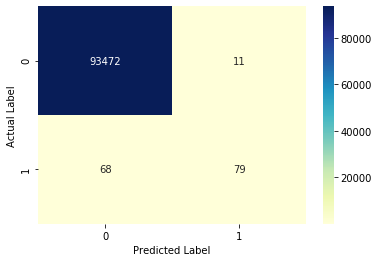

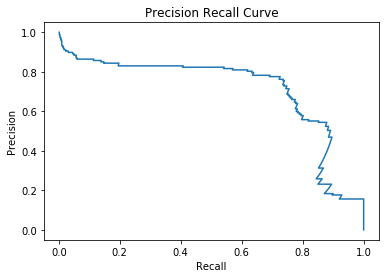

In [63]:
from sklearn.linear_model import LogisticRegression

print('Evaluation of Logistic Regression after balancing and pipeline steps: ')
result(LogisticRegression, "LogisticRegression", train_x, train_y, test_x, test_y)

Evaluation of k-NEAREST NEIGHBORS after balancing and pipeline steps: 

Accuracy: 0.99951
Precision: 0.93162
Recall: 0.74150
F1-score: 0.82576


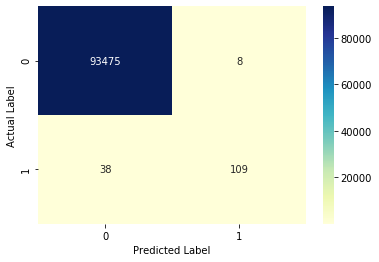

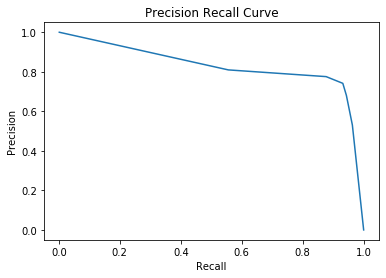

In [64]:
from sklearn.neighbors import KNeighborsClassifier

print('Evaluation of k-NEAREST NEIGHBORS after balancing and pipeline steps: ')
result(KNeighborsClassifier, "KNeighborsClassifier", train_x, train_y, test_x, test_y)

Evaluation of XGBoost after balancing and pipeline steps: 

Accuracy: 0.99958
Precision: 0.93548
Recall: 0.78912
F1-score: 0.85609


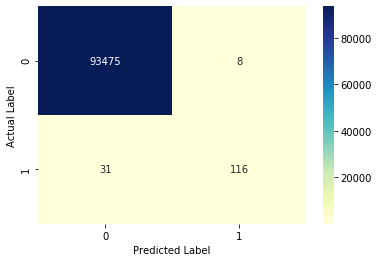

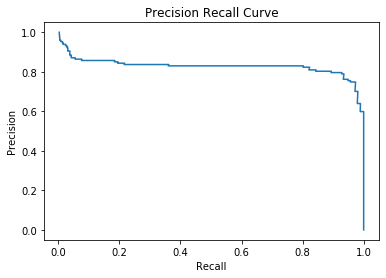

In [65]:
from xgboost import XGBClassifier

print('Evaluation of XGBoost after balancing and pipeline steps: ')
result(XGBClassifier, "XGBClassifier", train_x, train_y, test_x, test_y)

Evaluation of Decision tree after balancing and feature selection: 

Accuracy: 0.99920
Precision: 0.72785
Recall: 0.78231
F1-score: 0.75410


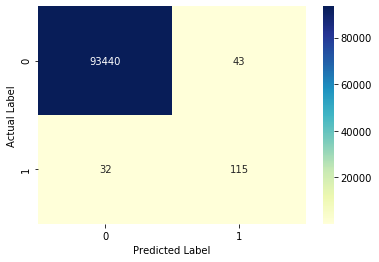

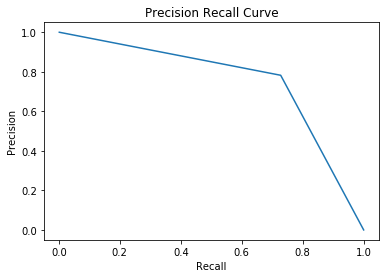

In [66]:
from sklearn.tree import DecisionTreeClassifier

print('Evaluation of Decision tree after balancing and feature selection: ')
result(DecisionTreeClassifier, "DecisionTreeClassifier", train_x, train_y, test_x, test_y)

In [67]:
test_x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
104697,69195.0,1.054379,-0.764756,0.160168,0.665587,1.113466,4.771656,-1.536609,1.306483,1.565054,...,0.050995,-0.097138,-0.029759,-0.171596,1.047201,0.698595,-0.217939,0.101970,0.040152,56.42
134356,80769.0,-4.805134,4.351191,-0.916135,-0.900752,-0.870777,-0.782946,0.328104,0.582501,2.749336,...,2.160193,-0.854486,-0.758266,0.147005,-0.021274,0.552660,0.008318,0.431835,-0.436239,9.82
42637,41182.0,-1.549833,-0.261143,1.556289,-2.037817,-0.366315,-1.334314,0.165406,-0.025782,-1.472751,...,-0.347365,-0.405656,-0.951005,-0.147752,0.424100,0.081845,1.103559,-0.502271,-0.248822,46.08
882,666.0,0.216344,0.663182,1.303520,0.169219,-0.404266,-0.517288,-0.036938,-0.838221,-0.528675,...,-0.184929,0.552788,-0.961206,-0.014642,0.525962,0.750877,0.141543,0.045107,0.127321,3.58
263275,160870.0,-0.273365,0.825649,0.555674,0.384915,1.343842,1.984159,0.321808,0.510275,-0.891463,...,0.172188,0.346482,1.162889,-0.557535,-0.896146,0.503553,0.555129,0.129099,0.047571,2.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231234,146663.0,2.164572,0.003121,-2.505570,-0.055481,1.197408,-0.243135,0.517497,-0.238011,-0.005902,...,-0.184372,0.071011,0.340833,-0.137116,-0.272316,0.504078,0.727219,-0.124227,-0.099683,0.76
19975,30692.0,1.037209,-1.728043,-0.054283,-1.182347,-1.504138,-0.580432,-0.571171,-0.203673,-1.919427,...,0.086154,0.016281,-0.067326,-0.205375,0.079323,0.347654,-0.109434,-0.010816,0.052257,247.90
238007,149487.0,0.066494,0.514866,-0.579907,-0.086939,0.843670,-0.005480,1.128850,-0.257029,-0.132532,...,-0.002952,-0.105600,-0.165410,0.199582,0.070776,-1.364918,0.226761,0.148730,0.262899,97.16
34633,37760.0,1.273330,0.014342,0.309879,0.100380,-0.631832,-1.177388,0.011384,-0.196129,0.252898,...,-0.109259,-0.237700,-0.763931,0.120808,0.410629,0.126412,0.805658,-0.092945,0.005559,13.46


In [68]:
df2 = pd.DataFrame({'Time': 0.234, 'V1': 0.123, 'V2': 1.234, 'V3': 1.234, 'V4': 1.234, 'V5': 1.234, 'V6': 1.234, 'V7': 1.234, 'V8': 1.234, 'V9': 1.234, 'V10': 1.234, 'V11': 1.234, 'V12': 1.234, 'V13': 1.234, 'V14': 1.234, 'V15': 1.234, 'V16': 1.234, 'V17': 1.234, 'V18': 1.234, 'V19': 1.234, 'V20': 1.234, 'V21': 1.234, 'V22': 1.234, 'V23': 1.234, 'V24': 1.234, 'V25': 1.234, 'V26': 1.234, 'V27': 1.234, 'V28': 1.234, 'Amount': 2.284}, index=[0])
df2

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.234,0.123,1.234,1.234,1.234,1.234,1.234,1.234,1.234,1.234,...,1.234,1.234,1.234,1.234,1.234,1.234,1.234,1.234,1.234,2.284


In [69]:
loaded_model = pickle.load(open('finalized_model_XGBClassifier.sav', 'rb'))

In [70]:
loaded_model

Pipeline(steps=[('ss', StandardScaler()),
                ('XGBClassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=0, num_parallel_tree=1, random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

In [72]:
new_class = loaded_model.predict(df2)
new_class

array([0], dtype=int64)

In [73]:
new_class[0]

0

In [79]:
listOfSecretQuestions =["What is the name of the city you first lived in?", 
                        "What is the name of your first pet?", 
                        "What is your mother’s maiden name?", 
                        "What is your favourite car model?",
                        "What is your partner’s middle name?",
                        "What is your childhood nickname?",
                        "What is your best friend’s name?"]

In [80]:
for count, question in enumerate(listOfSecretQuestions,1): 
    print(count , question)

1 What is the name of the city you first lived in?
2 What is the name of your first pet?
3 What is your mother’s maiden name?
4 What is your favourite car model?
5 What is your partner’s middle name?
6 What is your childhood nickname?
7 What is your best friend’s name?


In [81]:
selection = input("Please choose a secret question number from the above mentioned --->")

Please choose a secret question number from the above mentioned --->4


In [83]:
secretQuestion = listOfSecretQuestions[int(selection) - 1]
#secretQuestion

In [84]:
print("Please answer the question below, be mindful of the case.")

secretAnswer = input(secretQuestion)

Please answer the question below
What is your favourite car model?KIA


In [85]:
secretAnswer

'KIA'

In [108]:
import random

if new_class[0] == 0:
    
    l_sA = len(secretAnswer)
    random_sA = random.randint(1,l_sA+1)
    
    user_prompt = input('Please enter the character in position {} of your secret answer to validate this transaction ----->'.format(random_sA))
    print(user_prompt)
else:
    print('Transaction successful. Thank you!')

Please enter the character in position 2 of your secret answer to validate this transaction ----->i
i


In [109]:
if user_prompt == secretAnswer[random_sA-1]:
    print('Thank you for the confirmation! Transaction successful.')
else:
    print('We are sorry we cannot validate this transaction.')

We are sorry we cannot validate this transaction.
